<a href="https://colab.research.google.com/github/YangHyunu/Signiture/blob/main/16_cnn_multi_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --q ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.4 MB/s eta 0:00:00
time: 351 µs (started: 2024-07-08 04:11:13 +00:00)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

time: 6.85 s (started: 2024-07-08 04:11:13 +00:00)


## 1. 데이터 준비

In [3]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() # 데이터 리턴 값 받을 때 순서 주의!

4422102/4422102 [==============================] - 0s 0us/step
time: 2.18 s (started: 2024-07-08 04:11:22 +00:00)


In [4]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
time: 767 µs (started: 2024-07-08 04:11:24 +00:00)


In [5]:
y_train[:20]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

time: 4.73 ms (started: 2024-07-08 04:11:27 +00:00)


In [6]:
columns = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

time: 521 µs (started: 2024-07-08 04:11:34 +00:00)


## 2. 데이터 확인

In [7]:
np.random.seed(42)
sample = np.random.randint(60000,size=25)
sample # 6000만개의 데이터 중 25 가지 뽑인 INDEX값을 가짐

array([56422, 15795,   860, 38158, 54343, 44732, 11284, 54886,  6265,
       16850, 37194, 21962, 47191, 44131, 16023, 41090,  1685,   769,
       59735, 56101,  2433,  5311, 37819, 39188, 17568])

time: 12.2 ms (started: 2024-07-08 04:11:41 +00:00)


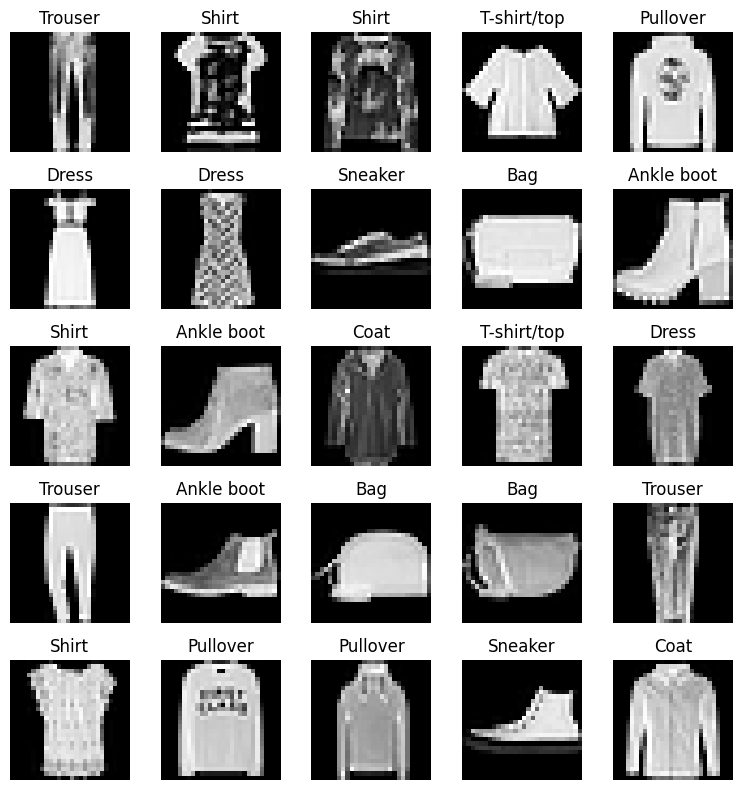

time: 5.13 s (started: 2024-07-08 04:13:10 +00:00)


In [8]:
plt.figure(figsize=(8,8))
for i, idx in enumerate(sample):
  plt.subplot(5, 5,i+1) # 25개 grid
  plt.imshow(X_train[idx],cmap='gray')
  plt.title(columns[y_train[idx]]) # 정답값 표시
  plt.axis('off')
  plt.tight_layout()
plt.show()

In [9]:
pd.Series(y_train).value_counts().sort_index() # y에 있는 레이블의 값 확인

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64

time: 18.4 ms (started: 2024-07-08 04:14:05 +00:00)


## 3. 데이터 분리 학습, 검증

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid= train_test_split(X_train,y_train,test_size=0.2,random_state=42)

time: 198 ms (started: 2024-07-08 04:14:15 +00:00)


In [11]:
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)
print(type(X_train),type(y_train))

(48000, 28, 28) (12000, 28, 28) (48000,) (12000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
time: 4.65 ms (started: 2024-07-08 04:14:16 +00:00)


In [12]:
X_train[0] # 신발이 보인다.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,
          0,   0,  15,  33, 121, 113,   0,   0,   3,   0,   0,   0,  70,
         11,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,   0,   0,
         67, 189, 254, 214, 224, 209,  19,   0,   0,   0,   0,   0, 242,
        196,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  90, 231,
        242, 227, 201, 178, 186, 208, 214,  95,   0,   0,   0, 102, 212,
        221,   0],
       [  0,   0,   0,   2,   2,   3,   0,   0,   0,  85, 252, 255, 205,
        137,  68, 163, 210, 206, 216, 246, 255, 241, 193, 177, 203, 194,
        228,  71],
       [  0,   2,   0,   0,   0,   0,   0,  92, 255, 255, 153,  65, 128,
        193, 161, 156, 203, 197, 203, 193, 200, 209, 225, 226, 220, 225,
        255, 171],
       [  0,   0,   0,   0,  17,  99, 232, 220, 134,  83, 125, 190, 213,
        202, 228, 163, 188, 206, 220, 215, 203, 192, 202, 234, 246, 240,
        244, 184],
       [  0,  38, 125, 152, 161, 163, 109,  69, 111, 163, 223, 144, 175,
        225, 221, 235, 183, 203, 217, 221, 223, 242, 253, 250, 233, 209,
        221, 212],
       [ 56, 207, 240, 239, 243, 240, 228, 226, 228, 211, 227, 206, 197,
        198, 208, 237, 230, 225, 230, 233, 237, 245, 242, 239, 241, 237,
        247, 221],
       [  0,  12,  24,  62,  87, 168, 231, 239, 236, 233, 225, 226, 225,
        230, 242, 246, 241, 236, 236, 246, 253, 253, 242, 236, 236, 227,
        255, 147],
       [  1,  14,   3,   4,   0,   0, 150, 255, 233, 239, 255, 255, 255,
        255, 255, 231, 189, 160, 143, 136, 115,  95,  78,  73,  70,  49,
         25,   0],
       [  0,   0,   0,   1,  13,   0,   0,   0,  10,  28,  42,  34,  29,
         29,  18,   0,   0,   0,   0,   0,   0,   0,   3,   1,   3,   1,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

time: 9.84 ms (started: 2024-07-08 04:14:17 +00:00)


## 4. 전처리
- X_ train,X_valid Min_Max Scaling
- y_train,y_valid one_hot encoding

In [13]:
# Min_Max Scalling
X_train_s= X_train/255.
X_valid_s= X_valid/255.

time: 119 ms (started: 2024-07-08 04:14:27 +00:00)


In [14]:
from keras import utils
y_train_o= utils.to_categorical(y_train)
y_valid_o = utils.to_categorical(y_valid)

time: 2.15 ms (started: 2024-07-08 04:14:32 +00:00)


In [15]:
y_train_o.shape, y_valid_o.shape

((48000, 10), (12000, 10))

time: 2.9 ms (started: 2024-07-08 04:14:32 +00:00)


In [16]:
print(y_train[:10])
y_train[:10]

[7 3 5 8 6 9 3 3 9 9]


array([7, 3, 5, 8, 6, 9, 3, 3, 9, 9], dtype=uint8)

time: 5.01 ms (started: 2024-07-08 04:14:34 +00:00)


In [17]:
print(X_train_s.shape, X_valid_s.shape)
print(y_train_o.shape, y_valid_o.shape)


(48000, 28, 28) (12000, 28, 28)
(48000, 10) (12000, 10)
time: 938 µs (started: 2024-07-08 04:14:36 +00:00)


## 5. 모델 학습
  - CNN


*   목적: 10개의 클래스(의류) 분류
*   CNN을 사용함



In [18]:
X_train_s.shape

(48000, 28, 28)

time: 4.52 ms (started: 2024-07-08 04:15:12 +00:00)


In [21]:
X_train_s = X_train_s.reshape(-1,28,28,1)
X_valid_s = X_valid_s.reshape(-1,28,28,1)
print(X_train_s.shape, X_valid_s.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1)
time: 2.93 ms (started: 2024-07-08 04:21:39 +00:00)


input_shape=(28, 28, 1)의 의미

    28, 28: 입력 이미지의 공간적 크기(높이, 너비)입니다. 여기서는 28x28 픽셀 크기의 이미지를 나타냅니다.
    1: 입력 이미지의 채널 수입니다. 흑백 이미지인 경우 채널 수가 1이고, 컬러 이미지(RGB)인 경우 채널 수가 3입니다.
    cnn의 경우 이미지를 입력받기 때문에 입력데이터의 차원이 3인 텐서가 입력됩니다.

In [22]:
from keras import layers
model = keras.Sequential([
    layers.Conv2D(filters=16, kernel_size=3,activation='relu',
                  input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Conv2D(filters=32, kernel_size=3, activation='relu',
                  ),
    layers.MaxPooling2D(pool_size=2),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10,activation='softmax'),

])

time: 1.14 s (started: 2024-07-08 04:23:19 +00:00)


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0

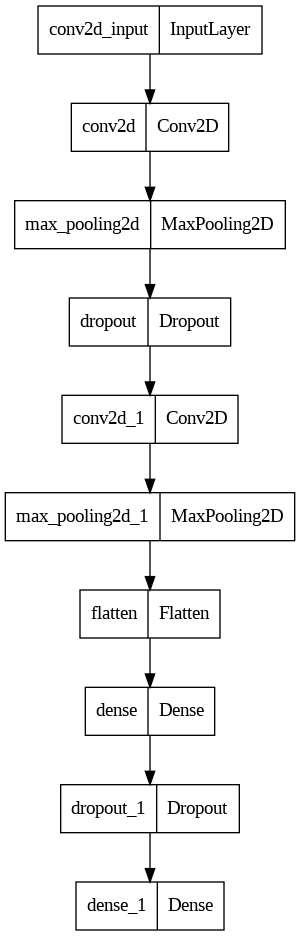

time: 200 ms (started: 2024-07-08 04:23:28 +00:00)


In [24]:
keras.utils.plot_model(model)

In [25]:
adam = keras.optimizers.Adam(learning_rate=0.01) # tuning
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

time: 26 ms (started: 2024-07-08 04:23:42 +00:00)


In [26]:
EPOCHS = 30
BATCH_SIZE=64

history = model.fit(X_train_s,y_train_o,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(X_valid_s,y_valid_o))

Epoch 1/30
750/750 [==============================] - 10s 5ms/step - loss: 0.5601 - accuracy: 0.7910 - val_loss: 0.3973 - val_accuracy: 0.8545
Epoch 2/30
750/750 [==============================] - 4s 6ms/step - loss: 0.4272 - accuracy: 0.8401 - val_loss: 0.3789 - val_accuracy: 0.8512
Epoch 3/30
750/750 [==============================] - 3s 5ms/step - loss: 0.4100 - accuracy: 0.8480 - val_loss: 0.4030 - val_accuracy: 0.8453
Epoch 4/30
750/750 [==============================] - 3s 4ms/step - loss: 0.3962 - accuracy: 0.8514 - val_loss: 0.3433 - val_accuracy: 0.8684
Epoch 5/30
750/750 [==============================] - 3s 5ms/step - loss: 0.3862 - accuracy: 0.8543 - val_loss: 0.3673 - val_accuracy: 0.8629
Epoch 6/30
750/750 [==============================] - 4s 5ms/step - loss: 0.3892 - accuracy: 0.8537 - val_loss: 0.3383 - val_accuracy: 0.8719
Epoch 7/30
750/750 [==============================] - 3s 4ms/step - loss: 0.3888 - accuracy: 0.8532 - val_loss: 0.3604 - val_accuracy: 0.8662
Epoch

In [27]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

time: 1.24 ms (started: 2024-07-08 04:27:30 +00:00)


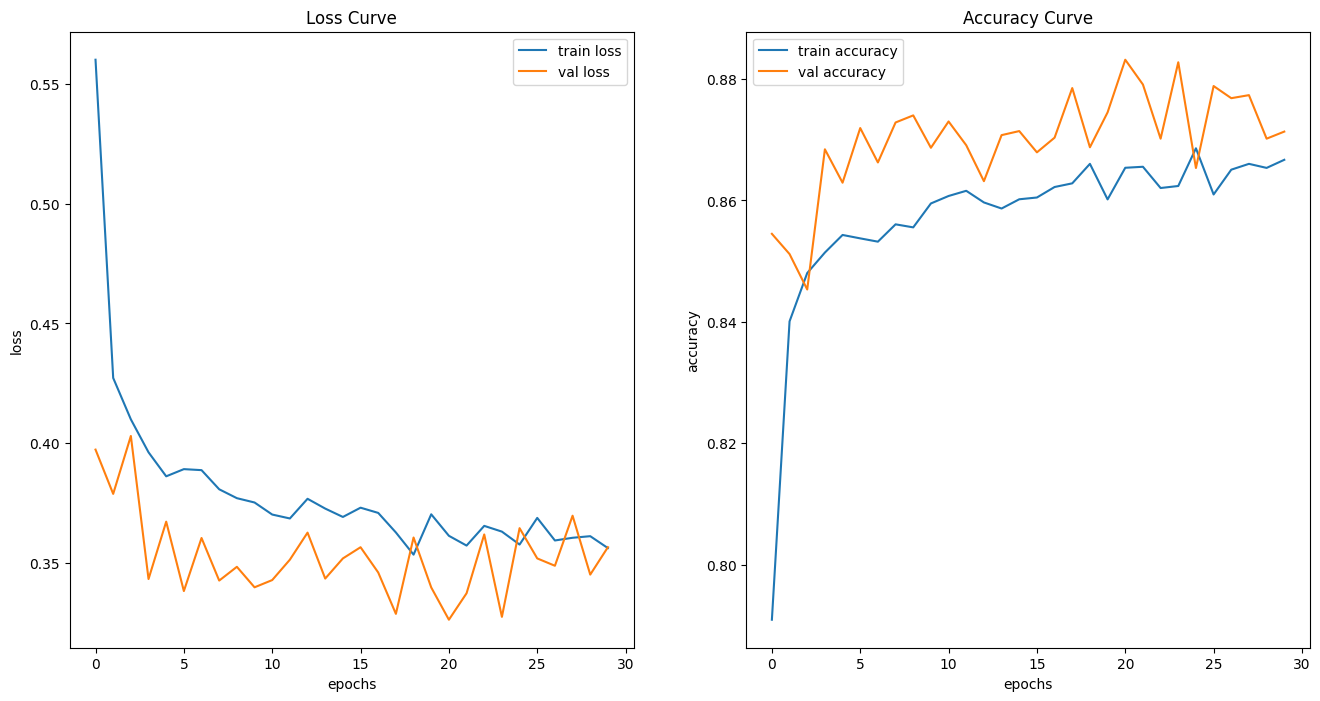

time: 435 ms (started: 2024-07-08 04:27:33 +00:00)


In [28]:
plot_history(history)

In [29]:
X_test_s = X_test/ 255.
X_test_s= X_test_s.reshape(-1,28,28,1)
y_test_o= utils.to_categorical(y_test)

time: 22.6 ms (started: 2024-07-08 04:27:38 +00:00)


In [30]:
X_test_s.shape, y_test_o.shape

((10000, 28, 28, 1), (10000, 10))

time: 3.4 ms (started: 2024-07-08 04:27:38 +00:00)


In [31]:
y_pred = model.predict(X_test_s)
y_pred[:10]

313/313 [==============================] - 1s 2ms/step


array([[5.93828191e-28, 2.72476416e-29, 7.53818807e-31, 2.96444304e-24,
        1.23557359e-34, 8.60585033e-07, 1.30679795e-21, 1.96191559e-06,
        9.02654154e-23, 9.99997139e-01],
       [3.11530926e-08, 1.39009408e-19, 9.99924660e-01, 5.83301324e-11,
        4.74747430e-05, 6.23964227e-21, 2.78806565e-05, 1.97483568e-31,
        9.81051351e-10, 1.52933978e-30],
       [1.31169888e-32, 1.00000000e+00, 0.00000000e+00, 3.53167190e-24,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.63857500e-35, 0.00000000e+00],
       [1.28705531e-16, 1.00000000e+00, 5.77040018e-25, 4.56239040e-12,
        1.89439870e-21, 1.31119128e-28, 3.57302120e-21, 0.00000000e+00,
        8.32808430e-21, 0.00000000e+00],
       [2.69071311e-01, 1.48863462e-03, 2.00487778e-01, 7.60821179e-02,
        8.96412209e-02, 3.21786888e-06, 3.58635902e-01, 1.05777442e-09,
        4.58983658e-03, 1.24840245e-08],
       [2.78260257e-25, 1.00000000e+00, 3.04327596e-29, 2.08890381e-18,
   

time: 1.5 s (started: 2024-07-08 04:27:39 +00:00)


In [32]:
y_pred = np.argmax(y_pred,axis=1)
y_pred[:5]

array([9, 2, 1, 1, 6])

time: 4.52 ms (started: 2024-07-08 04:27:49 +00:00)


In [33]:
y_test_o= np.argmax(  y_test_o,axis=1)
y_test_o[:5]

array([9, 2, 1, 1, 6])

time: 7.3 ms (started: 2024-07-08 04:28:10 +00:00)


In [34]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true,y_pred,aver='macro'):
  print('accuracy',accuracy_score(y_true,y_pred))
  print('recall',recall_score(y_true,y_pred,average=aver))
  print('precision',precision_score(y_true,y_pred,average=aver))
  print('f1_score',f1_score(y_true,y_pred, average=aver))

  cfm = confusion_matrix(y_true,y_pred)
  s = sns.heatmap(cfm,annot=True,cmap='Blues',fmt='d',cbar=False)
  s.set(xlabel='Prediction',ylabel='Actual')
  plt.show()

time: 8.01 ms (started: 2024-07-08 04:28:14 +00:00)


accuracy 0.8671
recall 0.8671
precision 0.8672963786683686
f1_score 0.8657051372132557


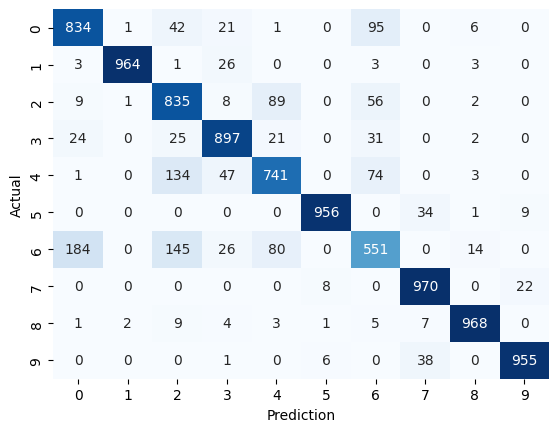

time: 677 ms (started: 2024-07-08 04:28:20 +00:00)


In [35]:
print_metrics(y_test_o,y_pred)

In [36]:
X_test.shape

(10000, 28, 28)

time: 3.01 ms (started: 2024-07-08 04:28:29 +00:00)


In [37]:
sample = np.random.randint(10000,size=25)

time: 519 µs (started: 2024-07-08 04:28:31 +00:00)


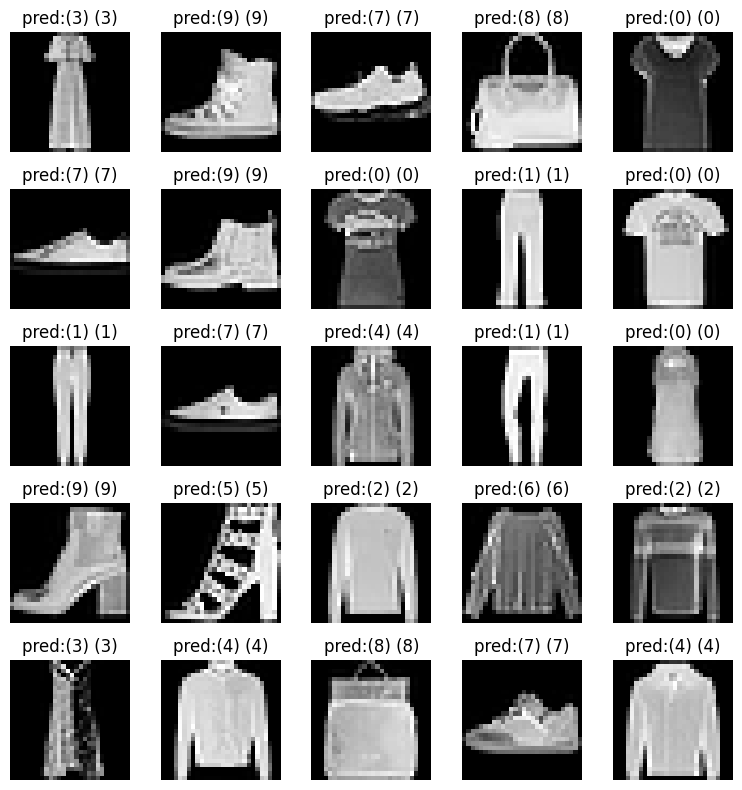

time: 3.15 s (started: 2024-07-08 04:28:33 +00:00)


In [38]:
plt.figure(figsize=(8,8))
for i, idx in enumerate(sample):
  plt.subplot(5, 5,i+1) # 25개 grid
  plt.imshow(X_test[idx],cmap='gray')
  plt.title(f'pred:({y_pred[idx]}) ({y_test[idx]})') # 정답값 표시
  plt.axis('off')
  plt.tight_layout()
plt.show()


## 7.모델 저장

In [ ]:
# model.save('cnn_multi_fashion.h5')

In [ ]:
model.save('cnn_multi_fashion.keras')

time: 140 ms (started: 2024-07-01 03:31:09 +00:00)


In [ ]:
model.save('cnn_multi_fashion') # TensorFlow로 저장

time: 754 ms (started: 2024-07-01 03:32:24 +00:00)


- 모델 로드

In [ ]:
loaded_model = keras.saving.load_model('/content/cnn_multi_fashion.h5')

time: 353 ms (started: 2024-07-01 03:35:16 +00:00)


In [ ]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)              

# 결론

*   주의점: cnn에 이미지데이터를 입력할 때 3차원 텐서로 입력값을 받는다.
*   자연어처리 모델, lstm 등에서도 각자 다른 입력값을 받으므로 주의해야 한다.

